In [1]:
# [Fonte]: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf
# [Arquivo]: Documento CSV de Acidentes 2024 (Agrupados por ocorrência)

In [2]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
# Carregando o dataset
url = 'https://drive.google.com/uc?export=download&id=1QPrqFsHCwWRA0MJZML8K7Fd773NhxfJV'
output = 'datatran2024.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv('datatran2024.csv', sep=';', encoding='latin-1')

Downloading...
From: https://drive.google.com/uc?export=download&id=1QPrqFsHCwWRA0MJZML8K7Fd773NhxfJV
To: /content/datatran2024.csv
100%|██████████| 13.9M/13.9M [00:00<00:00, 96.5MB/s]


In [4]:
# Visualizando o dataset
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47698,627756.0,2024-08-20,terça-feira,17:00:00,MG,116,"13,6",AGUAS VERMELHAS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-15,804386","-41,359894",SPRF-BA,DEL08-BA,UOP03-DEL08-BA
47699,627773.0,2024-06-01,sábado,19:20:00,MG,116,422,ALPERCATA,Animais na Pista,Atropelamento de Animal,...,0,0,0,1,1,"-18,95287041","-41,95682514",SPRF-MG,DEL06-MG,UOP01-DEL06-MG
47700,627777.0,2024-08-07,quarta-feira,18:10:00,RS,116,234,ESTANCIA VELHA,Acesso irregular,Colisão transversal,...,0,2,0,0,2,"-29,65121313","-51,1444433",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
47701,627911.0,2024-08-29,quinta-feira,07:30:00,MG,40,515,RIBEIRAO DAS NEVES,Condutor deixou de manter distância do veículo...,Engavetamento,...,1,1,0,2,3,"-19,8090079","-44,09493479",SPRF-MG,DEL01-MG,UOP02-DEL01-MG


In [5]:
# Criando uma cópia do DataFrame original para evitar o SettingWithCopyWarning.
d_copy = df.copy()

d_copy.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [6]:
# Visualizando as informações do dataset
d_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47703 entries, 0 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47703 non-null  float64
 1   data_inversa            47703 non-null  object 
 2   dia_semana              47703 non-null  object 
 3   horario                 47703 non-null  object 
 4   uf                      47703 non-null  object 
 5   br                      47703 non-null  int64  
 6   km                      47703 non-null  object 
 7   municipio               47703 non-null  object 
 8   causa_acidente          47703 non-null  object 
 9   tipo_acidente           47703 non-null  object 
 10  classificacao_acidente  47702 non-null  object 
 11  fase_dia                47703 non-null  object 
 12  sentido_via             47703 non-null  object 
 13  condicao_metereologica  47703 non-null  object 
 14  tipo_pista              47703 non-null

In [7]:
# Visualizando estatísticas dos dados
d_copy.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000,47703.000000
mean,598941.735342,208.991866,2.595686,0.083684,0.872754,0.277949,1.049997,0.401526,1.150703,1.997568
std,15376.120670,128.692052,2.124609,0.347850,1.074395,0.633861,1.671980,0.829789,1.203094,1.087082
min,571772.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,585716.500000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,599178.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,612284.500000,319.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,627985.000000,495.000000,61.000000,23.000000,42.000000,30.000000,60.000000,33.000000,45.000000,20.000000


In [8]:
# Mostrando todos os dados individualmente
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

id
[571789. 571804. 571806. ... 627777. 627911. 627985.]


data_inversa
['2024-01-01' '2024-01-02' '2024-01-03' '2024-01-04' '2024-01-05'
 '2024-01-06' '2024-01-07' '2024-01-08' '2024-01-09' '2024-01-10'
 '2024-01-11' '2024-01-12' '2024-01-13' '2024-01-14' '2024-01-15'
 '2024-01-16' '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-20'
 '2024-01-21' '2024-01-22' '2024-01-23' '2024-01-24' '2024-01-25'
 '2024-01-26' '2024-01-27' '2024-01-28' '2024-01-29' '2024-01-30'
 '2024-01-31' '2024-02-01' '2024-02-02' '2024-02-03' '2024-02-04'
 '2024-02-05' '2024-02-06' '2024-02-07' '2024-02-08' '2024-02-09'
 '2024-02-10' '2024-02-11' '2024-02-12' '2024-02-13' '2024-02-14'
 '2024-02-15' '2024-02-16' '2024-02-17' '2024-02-18' '2024-02-19'
 '2024-02-20' '2024-02-21' '2024-02-22' '2024-02-23' '2024-02-24'
 '2024-02-25' '2024-02-26' '2024-02-27' '2024-02-28' '2024-02-29'
 '2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '20

In [9]:
# Selecionando colunas tipo 'object'
categorical_columns = d_copy.select_dtypes(include=['object']).columns

# Verificando valores únicos em cada coluna categórica
unique_values_categorical = d_copy[categorical_columns].nunique()

# Exibir o resultado
print("Quantidade de valores únicos em colunas categóricas: ")
print(unique_values_categorical)

Quantidade de valores únicos em colunas categóricas: 
data_inversa                244
dia_semana                    7
horario                    1375
uf                           27
km                         6865
municipio                  1764
causa_acidente               69
tipo_acidente                17
classificacao_acidente        3
fase_dia                      4
sentido_via                   3
condicao_metereologica       10
tipo_pista                    3
tracado_via                 524
uso_solo                      2
latitude                  27253
longitude                 27247
regional                     28
delegacia                   152
uop                         393
dtype: int64


## 1. Limpeza de dados


In [10]:
# Contando o número de duplicatas
num_duplicatas = df.duplicated().sum()

print(f"Quantidade de duplicatas: {num_duplicatas}")

Quantidade de duplicatas: 0


In [11]:
# Contando o número total de valores nulos
num_nulos = df.isnull().sum().sum()

print(f"Quantidade de valores nulos: {num_nulos}")

Quantidade de valores nulos: 97


In [12]:
# Substituindo valores faltantes pela média
for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].mean(), inplace=True)

In [13]:
# Convertendo datas para formato datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

In [14]:
# Substituindo vírgulas por pontos e converter para float
d_copy['km'] = d_copy['km'].str.replace(',', '.').astype(float)
d_copy['longitude'] = d_copy['longitude'].str.replace(',', '.').astype(float)
d_copy['latitude'] = d_copy['latitude'].str.replace(',', '.').astype(float)

In [15]:
# Removendo as colunas 'tracado_via' e 'id'
d_copy = d_copy.drop(columns=['tracado_via', 'id'])

In [16]:
# Removendo as colunas 'horario' e 'data_inversa'
d_copy = d_copy.drop(columns=['horario', 'data_inversa'])

In [17]:
# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder a cada coluna de objeto
for col in d_copy.select_dtypes(include=['object']).columns:
    d_copy[col] = label_encoder.fit_transform(d_copy[col])

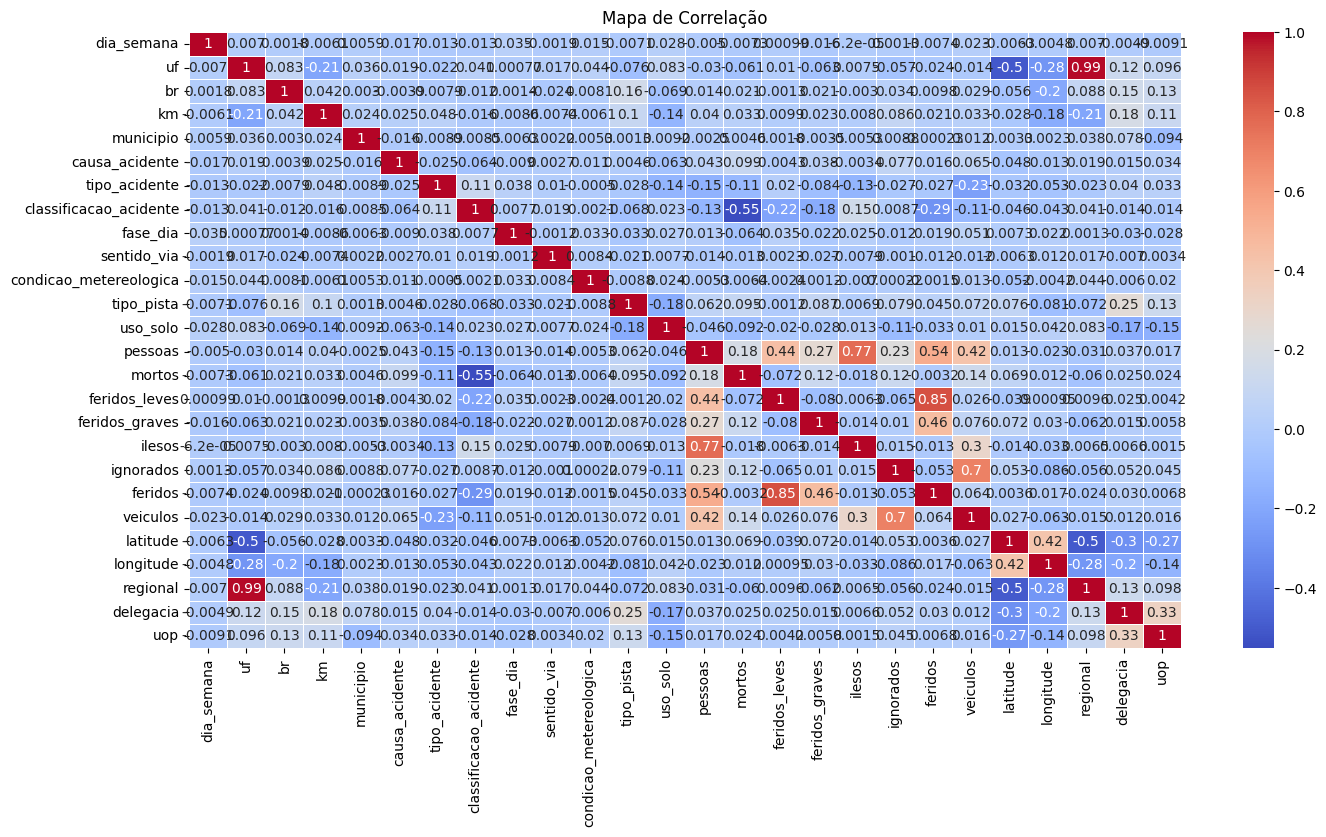

In [18]:
# Calculando a matriz de correlação
correlation_matrix = d_copy.corr()

# Gerando o mapa de calor (heatmap)
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

In [19]:
# Calculando IQR
Qmin = d_copy.quantile(0.10)
Qmax = d_copy.quantile(0.90)

IQR = Qmin - Qmax
IQR = Qmax - Qmin

limite_inferior = Qmin - 1.5 * IQR
limite_superior = Qmax + 1.5 * IQR

# Removendo os outliers
data_sem_outliers = (d_copy >= limite_inferior) & (d_copy <= limite_superior)
d_copy = d_copy[data_sem_outliers.all(axis=1)].reset_index()

In [20]:
d_copy

,index,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,0,3,7,101,38.0,431,66,6,3,2,...,1,1,1,1,3,-18.482610,-39.923790,7,73,218
1,3,3,24,101,18.0,925,51,14,1,0,...,1,0,2,1,3,-10.356019,-36.905522,24,47,192
2,4,3,12,364,240.0,1367,14,8,2,3,...,0,2,1,0,3,-16.179141,-54.789053,12,36,36
3,5,3,10,251,447.0,635,67,8,1,3,...,0,1,1,1,3,-16.434090,-43.279922,10,144,144
4,8,3,25,116,550.0,159,51,16,1,3,...,0,0,1,1,2,-24.957496,-48.464409,25,103,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42342,47697,0,7,101,445.5,995,45,1,1,2,...,1,2,0,1,2,-21.110463,-41.263511,7,54,200
42343,47698,6,10,116,13.6,27,51,14,1,3,...,0,0,0,1,1,-15.804386,-41.359894,4,126,351
42344,47699,5,10,116,422.0,45,7,0,1,2,...,0,0,0,1,1,-18.952870,-41.956825,10,107,107
42345,47700,1,22,116,234.0,539,1,7,2,1,...,0,2,0,0,2,-29.651213,-51.144443,22,22,173


# Modelagem

In [21]:
# Armazenando os dados limpos em um novo dataset
df_final = d_copy.copy()

In [22]:
X = df_final.drop(columns=['feridos_graves', 'feridos', 'mortos', 'feridos_leves', 'ilesos', 'classificacao_acidente', 'ignorados'])
y = df_final['classificacao_acidente']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Lista de modelos para testar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),  # Aumentar max_iter
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

In [24]:
accuracies = {}

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Imprimindo as acurácias
for name, accuracy in accuracies.items():
    print(f'Acurácia do {name}: {accuracy:.2f}')

Acurácia do Decision Tree: 0.76
Acurácia do Random Forest: 0.85
Acurácia do SVM: 0.82
Acurácia do Logistic Regression: 0.82
Acurácia do K-Nearest Neighbors: 0.80
Acurácia do Gradient Boosting: 0.85


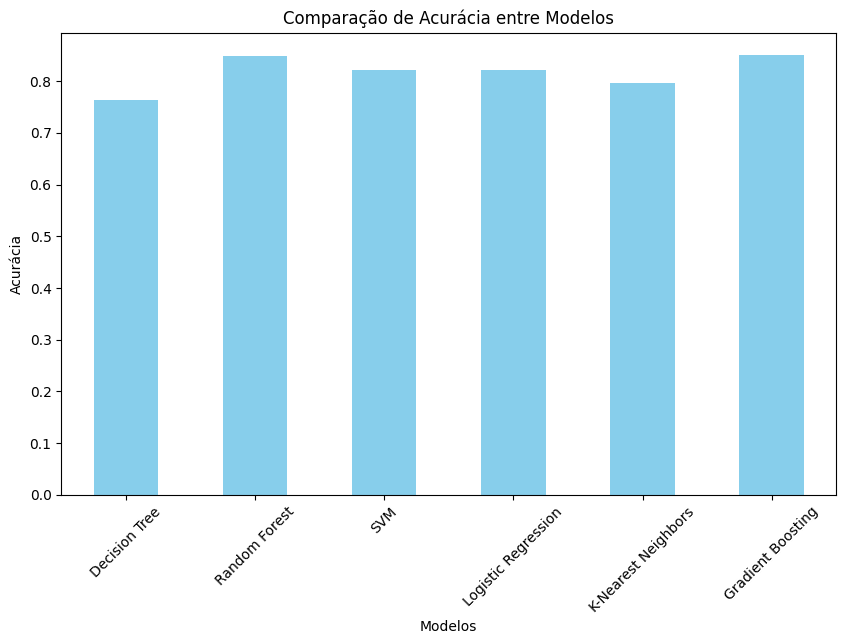

In [25]:
# Visualizando as acurácias
pd.Series(accuracies).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Obtendo as features mais importantes para o modelo
model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Crie um DataFrame para organizar as importâncias das features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordene as importâncias em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

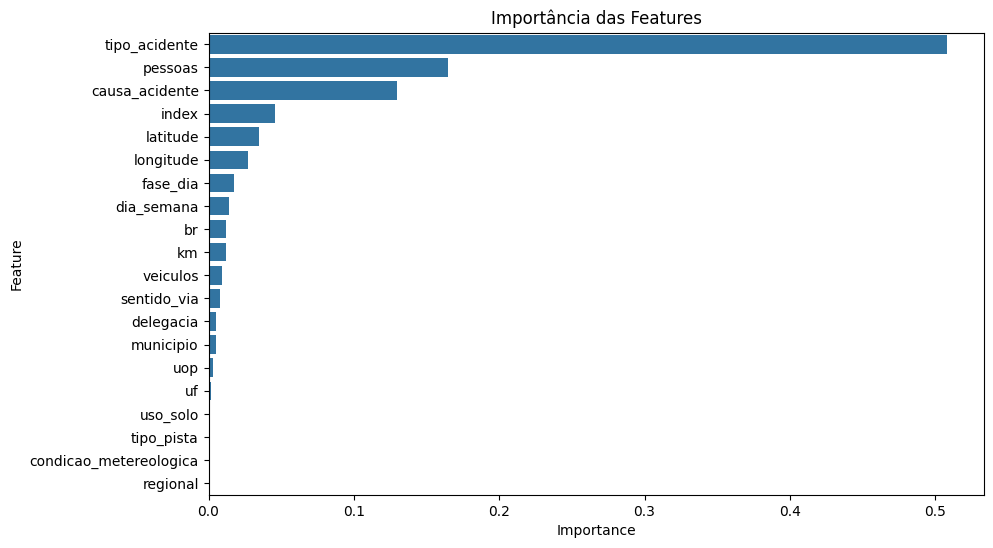

In [27]:
# Visualizando o Feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features')
plt.show()